In [1]:
import pymc as pm
from pymc_experimental.marginal_model import MarginalModel
import pandas as pd
import numpy as np
import arviz as az

## The original model

In [2]:
# TODO: Try to handle np.nan
# fmt: off
disaster_data = pd.Series(
    [4, 5, 4, 0, 1, 4, 3, 4, 0, 6, 3, 3, 4, 0, 2, 6,
     3, 3, 5, 4, 5, 3, 1, 4, 4, 1, 5, 5, 3, 4, 2, 5,
     2, 2, 3, 4, 2, 1, 3, np.nan, 2, 1, 1, 1, 1, 3, 0, 0,
     1, 0, 1, 1, 0, 0, 3, 1, 0, 3, 2, 2, 0, 1, 1, 1,
     0, 1, 0, 1, 0, 0, 0, 2, 1, 0, 0, 0, 1, 1, 0, 2,
     3, 3, 1, np.nan, 2, 1, 1, 1, 1, 2, 4, 2, 0, 0, 1, 4,
     0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1]
)
# fmt: on

years = np.arange(1851, 1962)

In [3]:
with MarginalModel() as disaster_model:
    switchpoint = pm.DiscreteUniform("switchpoint", lower=years.min(), upper=years.max())

    early_rate = pm.Exponential("early_rate", 1.0)
    late_rate = pm.Exponential("late_rate", 1.0)
    rate = pm.math.switch(switchpoint >= years, early_rate, late_rate)

    disasters = pm.Poisson("disasters", rate, observed=disaster_data)

/home/ricardo/Documents/Projects/pymc/pymc/model.py:1378: ImputationWarning: Data in disasters contains missing values and will be automatically imputed from the sampling distribution.
  warnings.warn(impute_message, ImputationWarning)


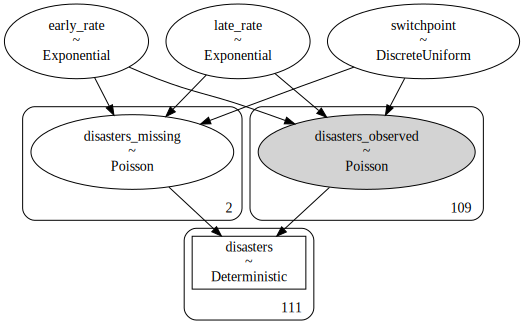

In [4]:
pm.model_to_graphviz(disaster_model)

In [5]:
with disaster_model:
    trace = pm.sample()

Multiprocess sampling (4 chains in 4 jobs)
CompoundStep
>CompoundStep
>>Metropolis: [switchpoint]
>>Metropolis: [disasters_missing]
>NUTS: [early_rate, late_rate]


Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 6 seconds.


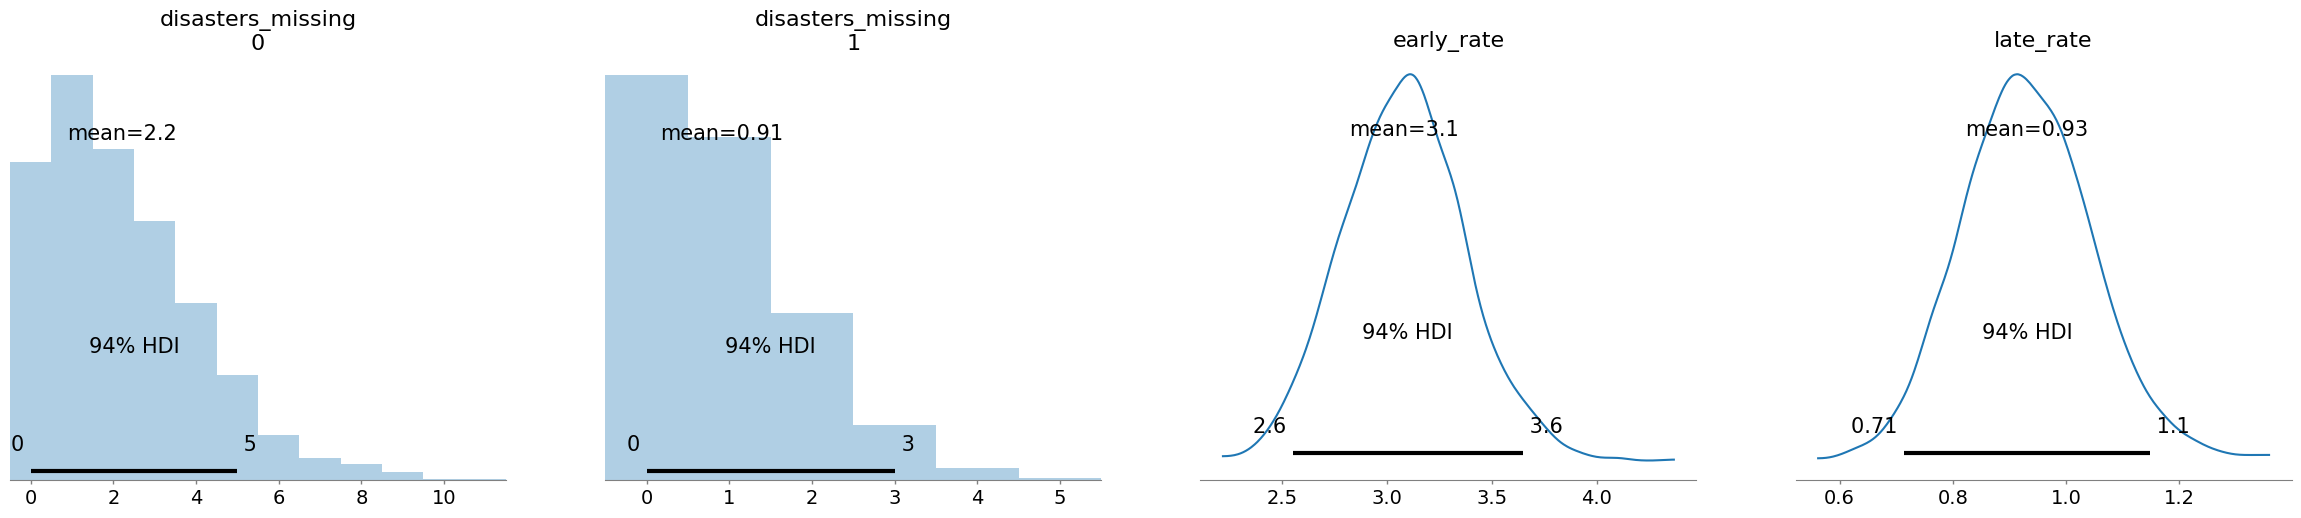

In [6]:
az.plot_posterior(trace, var_names=["~switchpoint", "~disasters"]);

In [7]:
az.summary(trace, var_names=["~switchpoint", "~disasters"])

,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
disasters_missing[0],2.203,1.869,0.000,5.000,0.095,0.067,373.0,417.0,1.01
disasters_missing[1],0.913,0.967,0.000,3.000,0.037,0.027,723.0,932.0,1.00
early_rate,3.081,0.289,2.551,3.646,0.006,0.004,2427.0,2785.0,1.00
late_rate,0.930,0.116,0.713,1.149,0.002,0.002,2725.0,2749.0,1.00


## Marginalized model

In [8]:
disaster_model.marginalize([switchpoint])

/home/ricardo/Documents/Projects/pymc-experimental/pymc_experimental/marginal_model.py:117: UserWarning: There are multiple dependent variables in a FiniteDiscreteMarginalRV.
Their joint logp terms will be assigned to the first RV: disasters_missing
  warnings.warn(


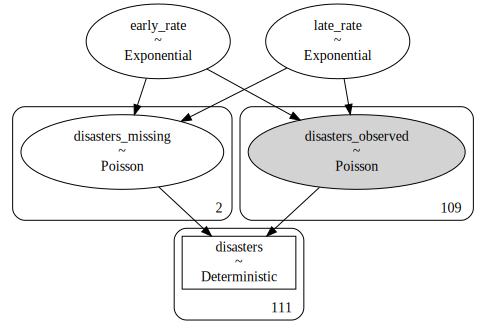

In [9]:
pm.model_to_graphviz(disaster_model)

In [10]:
with disaster_model:
    trace = pm.sample()

Multiprocess sampling (4 chains in 4 jobs)
CompoundStep
>NUTS: [early_rate, late_rate]
>Metropolis: [disasters_missing]


Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 77 seconds.


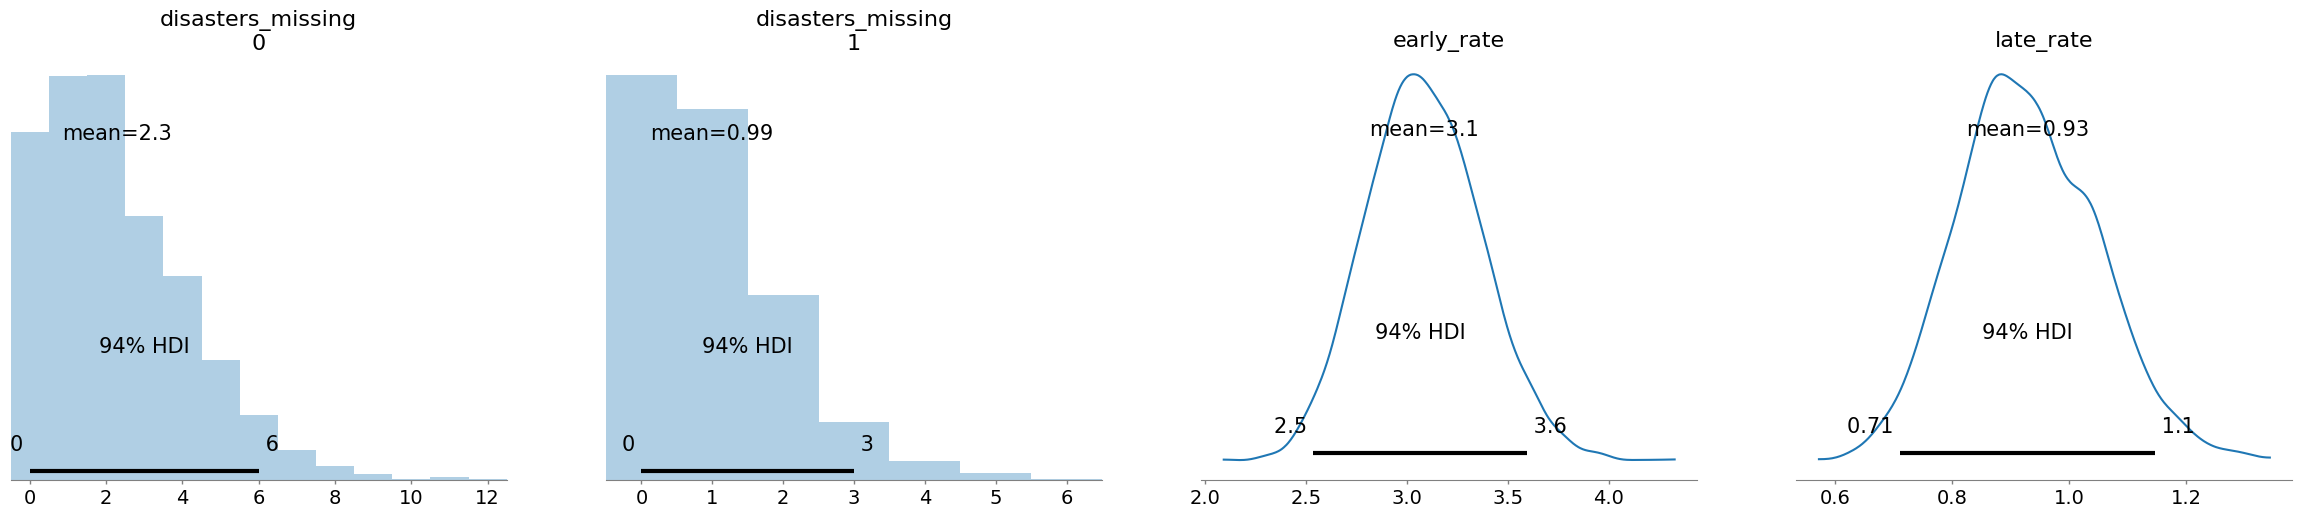

In [11]:
az.plot_posterior(trace, var_names="~disasters");

In [12]:
az.summary(trace, var_names="~disasters")

,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
disasters_missing[0],2.272,1.906,0.000,6.000,0.079,0.060,618.0,685.0,1.01
disasters_missing[1],0.990,1.045,0.000,3.000,0.040,0.030,712.0,652.0,1.01
early_rate,3.085,0.283,2.538,3.592,0.005,0.003,3770.0,3235.0,1.00
late_rate,0.929,0.118,0.711,1.147,0.002,0.001,3214.0,2258.0,1.00
